In [17]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt      #1 is fault 0 is actual

#change the location first
Site_case = pd.read_csv(r'E:\Thesis\transformer data 36\Ref_case_12.csv') #H1-H2
Ref_case = pd.read_csv(r'E:\Thesis\transformer data 36\site_case_12.csv') #H2-H3

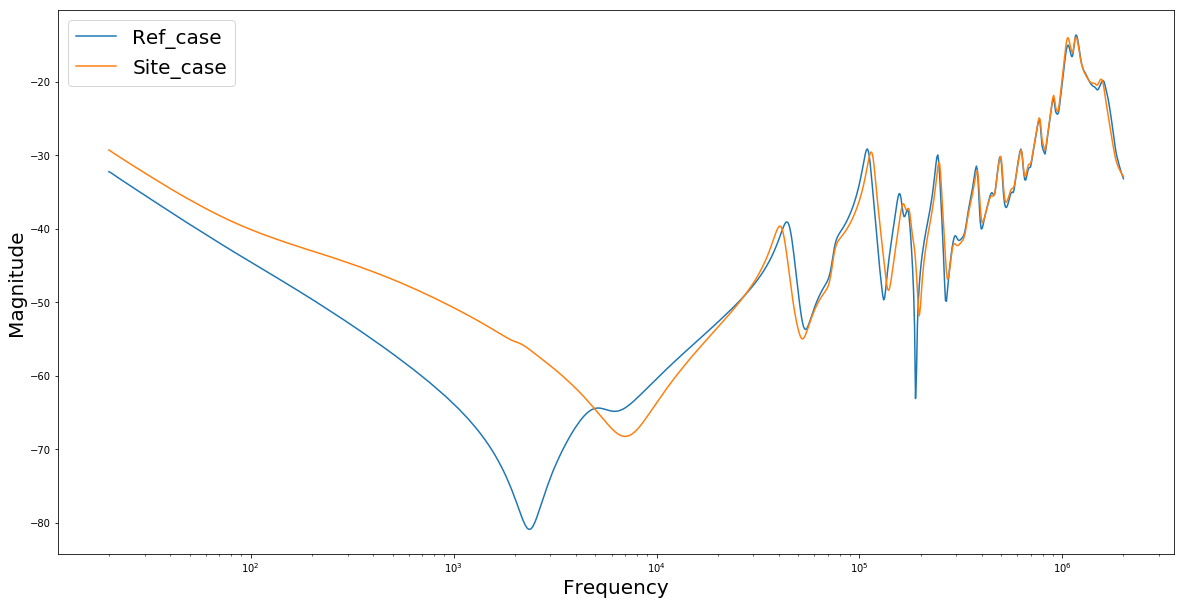

In [2]:
plt.figure(figsize=(20,10))
a = plt.plot(Ref_case['Frequency'], Ref_case['Magnitude'], label='Ref_case')
b = plt.plot(Site_case['Frequency'], Site_case['Magnitude'], label= 'Site_case')
plt.xscale('log')
plt.xlabel('Frequency', fontsize = 20)
plt.ylabel('Magnitude', fontsize = 20)
plt.legend(fontsize = 20)

In [3]:
Ref_case=np.array(Ref_case)
Site_case= np.array(Site_case)

In [4]:
case= np.vstack([Ref_case,Site_case])

In [5]:
case.shape

(2000, 2)

In [6]:
X = case[:, :2]

In [7]:
X.shape

(2000, 2)

In [13]:
X = X.reshape(-1,40)
X.shape

(100, 40)

In [14]:
X.shape, X[0]

((100, 40),
 array([ 20.       , -32.220321 ,  20.6542484, -32.4414382,  21.3298988,
        -32.7149849,  22.0276515, -32.9746404,  22.7482292, -33.2249137,
         23.4923789, -33.4906608,  24.2608714, -33.7479992,  25.0545032,
        -33.9947436,  25.8740967, -34.2573505,  26.720501 , -34.510567 ,
         27.5945932, -34.76465  ,  28.4972791, -35.0105507,  29.4294941,
        -35.2714866,  30.3922041, -35.5138505,  31.3864066, -35.7748895,
         32.4131319, -36.0269046,  33.4734439, -36.2783113,  34.5684413,
        -36.5366833,  35.6992586, -36.7867963,  36.8670678, -37.0425728]))

In [15]:
y = np.zeros((100))
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
y[50:] = 1

In [17]:
y.shape

(100,)

In [18]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

test_size= .25
seed= 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [20]:
clf = MLPClassifier(activation='relu',solver='adam', alpha=0.0001,
                   hidden_layer_sizes=(100,4), random_state=seed)

clf.fit(X_train,y_train)

result= clf.score(X_train, y_train)
result = result * 100
print(result,'%')

46.666666666666664 %


C:\Users\ayub_\Miniconda3\envs\py3k\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
from sklearn.metrics import classification_report
predictions= clf.predict(X_test)
print(accuracy_score(y_test, predictions)*100,'%')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

60.0 %
[[ 0 10]
 [ 0 15]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.60      1.00      0.75        15

   micro avg       0.60      0.60      0.60        25
   macro avg       0.30      0.50      0.37        25
weighted avg       0.36      0.60      0.45        25



C:\Users\ayub_\Miniconda3\envs\py3k\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
